In [1]:
!pip install -r requirements.txt -q

# Get the data

In [2]:
# Login to Kaggle
# Download the dataset
# https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images/data
# unzip the dataset

# FOLDER STRUCTURE:
# /melanoma_cancer_dataset
#     /train
#        /benign
#        /malignant
#     /test
#        /benign
#        /malignant

In [3]:
import tensorflow as tf
import numpy as np


In [4]:
tensorflow_version = tf.__version__
print(f"Tensorflow version: {tensorflow_version}")

Tensorflow version: 2.13.1


In [5]:
train_path = "melanoma_cancer_dataset/train"

In [6]:
# Load the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')




Found 9605 images belonging to 2 classes.


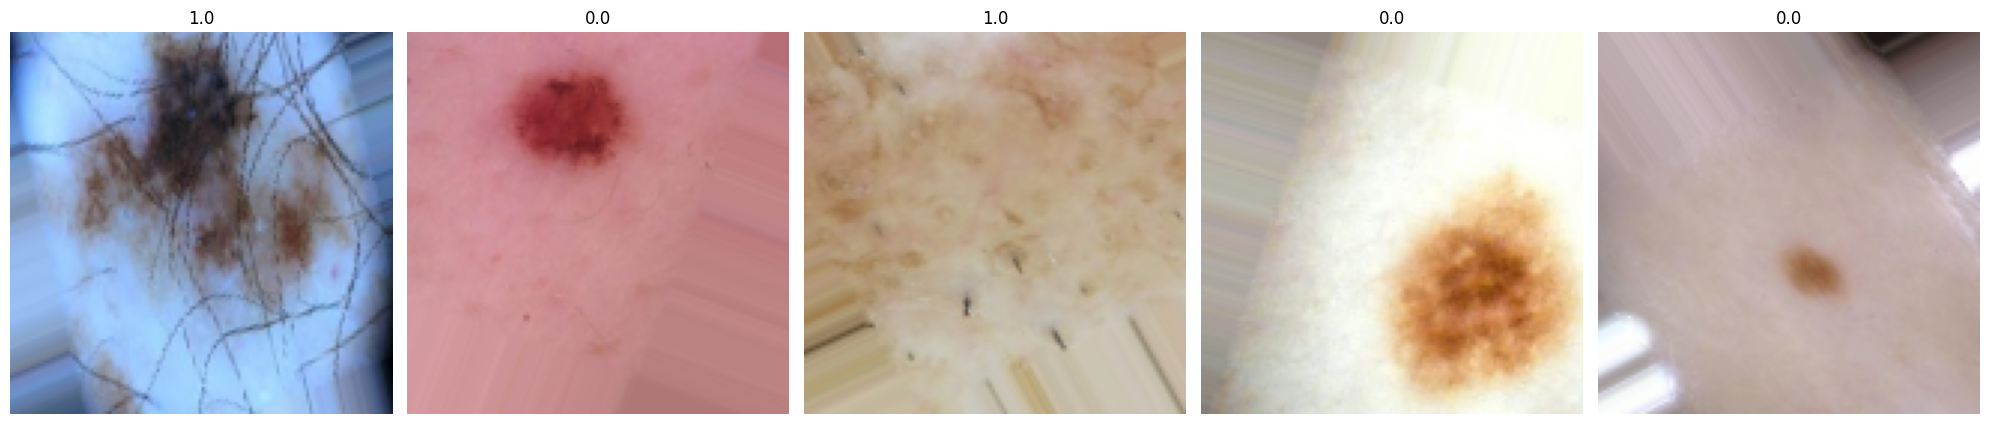

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Visualize the data
import matplotlib.pyplot as plt

def plotImages(images_arr,label):
    # plot images and labels
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax,l in zip(images_arr, axes,label):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(l)
    plt.tight_layout()
    plt.show()

# Sample and plot a few images
sample_training_images, label = next(train_generator)
plotImages(sample_training_images[:5], label[:5])

In [23]:
# Training the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'binary_crossentropy'

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])



In [24]:
history = model.fit(train_generator, epochs=10)

Epoch 1/10
301/301 [==============================] - 145s 479ms/step - loss: 0.4480 - accuracy: 0.7936
Epoch 2/10
301/301 [==============================] - 93s 310ms/step - loss: 0.3353 - accuracy: 0.8579
Epoch 3/10
301/301 [==============================] - 94s 312ms/step - loss: 0.3248 - accuracy: 0.8580
Epoch 4/10
301/301 [==============================] - 91s 302ms/step - loss: 0.3008 - accuracy: 0.8739
Epoch 5/10
301/301 [==============================] - 91s 302ms/step - loss: 0.3025 - accuracy: 0.8741
Epoch 6/10
301/301 [==============================] - 95s 316ms/step - loss: 0.3003 - accuracy: 0.8731
Epoch 7/10
301/301 [==============================] - 95s 314ms/step - loss: 0.2886 - accuracy: 0.8828
Epoch 8/10
301/301 [==============================] - 95s 317ms/step - loss: 0.2789 - accuracy: 0.8814
Epoch 9/10
301/301 [==============================] - 96s 318ms/step - loss: 0.2758 - accuracy: 0.8840
Epoch 10/10
301/301 [==============================] - 92s 306ms/step - 

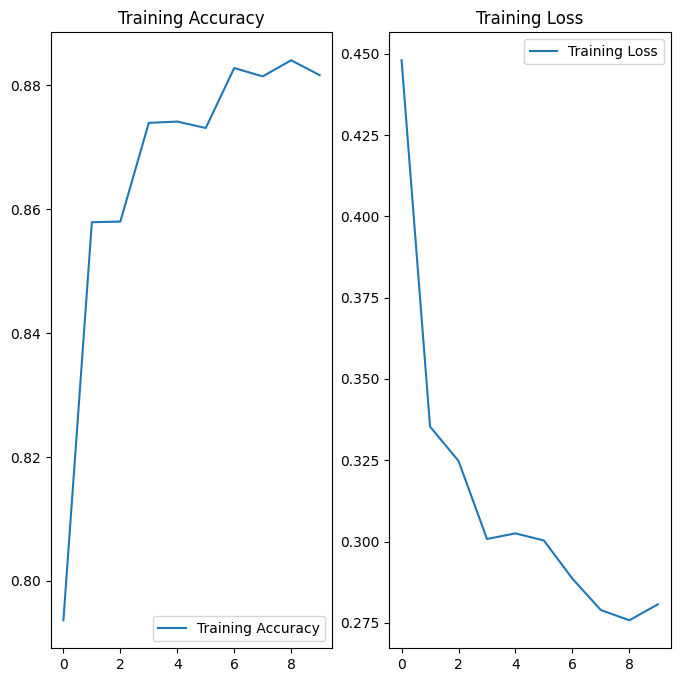

In [25]:
#  Visualize the model performance
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()


In [26]:
# Evaluate the model
test_path = "melanoma_cancer_dataset/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

model.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 6s 197ms/step - loss: 0.2612 - accuracy: 0.8980


[0.2611982524394989, 0.8980000019073486]

In [27]:
# Save the model
model.save('melanoma_cancer_model.h5')


c:\Users\dor\Documents\personal_projects\EveryOtherFreckle\.conda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
